In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
import numpy as np


(train_data, train_labels), (test_data, test_labels) = imdb. load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)



2025-10-07 21:32:04.071657: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.7684 - loss: 0.5600 - val_accuracy: 0.8450 - val_loss: 0.4448
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8846 - loss: 0.3601 - val_accuracy: 0.8771 - val_loss: 0.3359
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9105 - loss: 0.2673 - val_accuracy: 0.8859 - val_loss: 0.2916
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9240 - loss: 0.2186 - val_accuracy: 0.8816 - val_loss: 0.2974
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9371 - loss: 0.1833 - val_accuracy: 0.8873 - val_loss: 0.2781
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9501 - loss: 0.1558 - val_accuracy: 0.8896 - val_loss: 0.2811
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9549 - loss: 0.1371 - val_accuracy: 0.8836 - val_loss: 0.2990
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9637 - loss: 0.1175 - val_accuracy: 0.8834 - v

In [3]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_smaller_model = model.fit(
    train_data, train_labels, 
    epochs=20, batch_size=512, validation_split=0.4)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.6442 - loss: 0.6377 - val_accuracy: 0.7679 - val_loss: 0.5946
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7617 - loss: 0.5558 - val_accuracy: 0.8158 - val_loss: 0.5433
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8281 - loss: 0.5044 - val_accuracy: 0.7963 - val_loss: 0.5135
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8649 - loss: 0.4681 - val_accuracy: 0.8365 - val_loss: 0.4914
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8886 - loss: 0.4402 - val_accuracy: 0.8510 - val_loss: 0.4765
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9078 - loss: 0.4167 - val_accuracy: 0.8342 - val_loss: 0.4784
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9223 - loss: 0.3963 - val_accuracy: 0.8763 - val_loss: 0.4558
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9349 - loss: 0.3783 - val_accuracy: 0.8638 - v

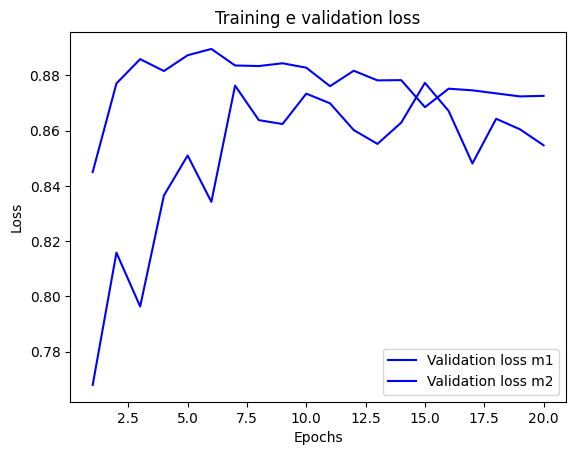

In [4]:
import matplotlib.pyplot as plt

val_acc = history_original.history["val_accuracy"]
val_acc2 = history_smaller_model.history["val_accuracy"]

loss_values = history_original.history["loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, val_acc, "b", label="Validation loss m1")
plt.plot(epochs, val_acc2, "b", color="red", label="Validation loss m2")
plt.title("Training e validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

L1 Reg: il costo aggiunto è proporzionale al valore assoluto dei coefficienti di peso
L2 Reg: il costo aggiunto è proporzionale al quadrato del valore dei coefficienti di peso

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.7743 - loss: 0.6089 - val_accuracy: 0.8461 - val_loss: 0.4897
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8943 - loss: 0.3971 - val_accuracy: 0.8836 - val_loss: 0.3862
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9177 - loss: 0.3262 - val_accuracy: 0.8905 - val_loss: 0.3614
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9254 - loss: 0.2933 - val_accuracy: 0.8916 - val_loss: 0.3536
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9365 - loss: 0.2689 - val_accuracy: 0.8596 - val_loss: 0.4131
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9389 - loss: 0.2557 - val_accuracy: 0.8866 - val_loss: 0.3574
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9431 - loss: 0.2453 - val_accuracy: 0.8670 - val_loss: 0.4016
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9464 - loss: 0.2378 - val_accuracy: 0.8845 - v

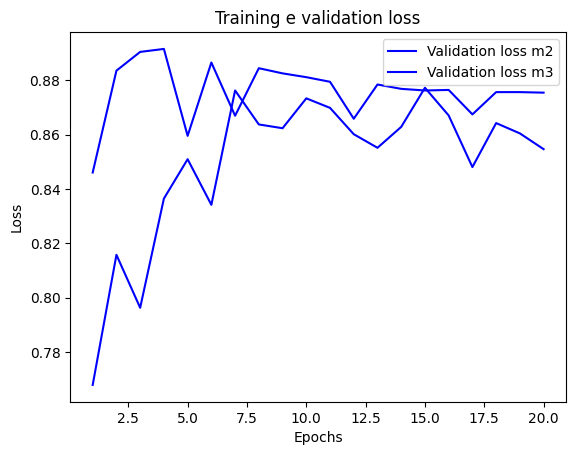

In [6]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

    

/tmp/ipykernel_4047/4240720352.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_acc3, "b", color="red",label="Validation loss m3")


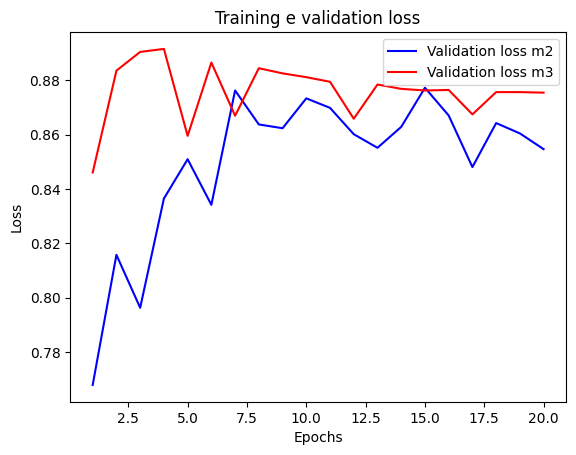

In [7]:
val_acc3 = history_l2_reg.history["val_accuracy"]

loss_values = history_original.history["loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, val_acc2, "b", label="Validation loss m2")
plt.plot(epochs, val_acc3, "b", color="red",label="Validation loss m3")
plt.title("Training e validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Dropout: randomicamente droppa un valore e lo imposta a 0

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.6397 - loss: 0.6352 - val_accuracy: 0.8417 - val_loss: 0.5299
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7797 - loss: 0.5090 - val_accuracy: 0.8678 - val_loss: 0.4084
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8331 - loss: 0.4178 - val_accuracy: 0.8816 - val_loss: 0.3450
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8689 - loss: 0.3571 - val_accuracy: 0.8862 - val_loss: 0.2984
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8873 - loss: 0.3115 - val_accuracy: 0.8906 - val_loss: 0.2841
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9072 - loss: 0.2712 - val_accuracy: 0.8881 - val_loss: 0.2740
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9209 - loss: 0.2421 - val_accuracy: 0.8893 - val_loss: 0.2751
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9281 - loss: 0.2171 - val_accuracy: 0.8892 - v

/tmp/ipykernel_4047/3445866815.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_acc4, "b", color="red",label="Validation loss m4")


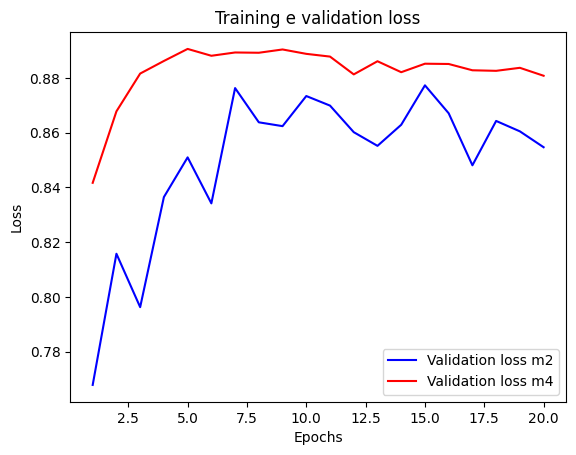

In [8]:
model = keras.Sequential([
    layers.Dense(16,activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16,activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1,activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

val_acc4 = history_dropout.history["val_accuracy"]

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, val_acc2, "b", label="Validation loss m2")
plt.plot(epochs, val_acc4, "b", color="red",label="Validation loss m4")
plt.title("Training e validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
